In [1]:
#1
!pip install transformers
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 4.9 MB/s eta 0:00:00


In [2]:
#2
from transformers import TFAutoModelForTokenClassification, AutoTokenizer 
from matplotlib import pyplot as plt 
import tensorflow as tf 
import praw 
import pandas as pd 
import wordcloud
import numpy as np 

In [4]:
#3
model = TFAutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english") 
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased") 

Some layers from the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing TFBertForTokenClassification: ['dropout_147']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


In [5]:
#4
label_list = ["O", "B-MISC", "I-MISC", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC",  "I-LOC"]

In [6]:
#5
reddit = praw.Reddit(client_id='4sh9jtxWs3u7Ig', 
                     client_secret='gMr4BiX0dTlJMvWpYDxLYgW6Bgk6eQ',
                     user_agent='Jyoshna') 

In [7]:
#6
def replies_of(top_level_comment, comment_list):
    if len(top_level_comment.replies) == 0:
        return
    else:
        for num, comment in enumerate(top_level_comment.replies):
            try:
                comment_list.append(str(comment.body))
            except:
                continue
            replies_of(comment, comment_list)

In [8]:
#7
count = 0
master_dict = {'I-LOC': [], 'I-ORG': [], 'I-PER': [], 'B-LOC': [], 'B-ORG': [], 'B-PER': []} #BERT recognised tags for its pre trained vocabulary
word_temp = ''
current_tag = ''
old_tag = ''
print_dict = {}

In [9]:
#8
list_of_subreddit = ['news']

In [10]:
#9
for j in list_of_subreddit:   
    top_posts = reddit.subreddit(j).top('month', limit=1) 
    comment_list=[]
    for submission in top_posts:
        submission_comm = reddit.submission(id=submission.id)
        print("Title:",submission.title)
        print('\n')
        comment_list.append(str(submission.title))

        for count, top_level_comment in enumerate(submission_comm.comments):
            try:
                replies_of(top_level_comment, comment_list)
            except:
                continue
            
print("The Extracted comments are as follows:\n")
print(comment_list)
print("\nLength of the comment list:\n")
print(len(comment_list))

<ipython-input-10-110bbdd69372>:3: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  top_posts = reddit.subreddit(j).top('month', limit=1)
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: Clarence Thomas has accepted undisclosed luxury trips from GOP megadonor for decades, report says


The Extracted comments are as follows:

['Clarence Thomas has accepted undisclosed luxury trips from GOP megadonor for decades, report says', "What I don't understand is...what is the average salary of a Superior Court Judge?  Can they not afford thier own vacations?  \n  \nI mean.. I know the main answer is probably greed greed and more greed...but is that it?  or am I missing something?", 'The problem isn’t that they’re “only” paid 300k/yr, it’s that they are surrounded by people making millions/billions and it makes their 300k seem tiny. \n\nPoliticians are much cheaper than we all thought. Some of them sell out for as little as 10-50k… it’s embarrassing.\n\nEdit: forgot to say, this is also why we need TERM LIMITS. Especially for SC justices, good lord.', "> ’s that they are surrounded by people making millions/billions and it makes their 300k seem tiny. \n\nAnd the only way t

In [11]:
#10
for sequence in comment_list:
    if len(sequence) > 512: 
        continue
    
    tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
    print("\nTokens are as follows:\n")
    print(tokens)
    inputs = tokenizer.encode(sequence, return_tensors="tf") #coverts token arrays into tensors
    print("\nInputs are as follows:\n")
    print(inputs)
    outputs = model(inputs)[0]
    print("\nOutputs are as follows:\n")
    print(outputs)
    predictions = tf.argmax(outputs, axis=2) 


    list_bert = [(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())] 
    print("\nThis is the list_bert:\n")
    print(list_bert)


    for i in list_bert:
        if i[1] in ['O', 'B-MISC', 'I-MISC']:
            # print('in if')
            if len(current_tag) > 0:
                without_space_word = word_temp.strip()
                if len(without_space_word) > 1:
                    master_dict[current_tag].append(without_space_word)
            count = 0
            word_temp = ''
            current_tag = ''
            continue
        else:
            current_tag = i[1]

            if old_tag != current_tag and len(old_tag) > 0:
                without_space_word = word_temp.strip()
                if len(without_space_word) > 1:
                    master_dict[old_tag].append(without_space_word)
                count = 0
                word_temp = ''
                current_tag = ''

            if i[0].startswith('##'): 
                word_temp += i[0][2:].upper()
            elif i[1] in ['I-PER', 'I-ORG', 'I-LOC', 'B-LOC', 'B-ORG', 'B-PER']:
                word_temp += " " + i[0].upper()
                current_tag = i[1]
                count += 1
            old_tag = current_tag

Streaming output truncated to the last 5000 lines.
   -8.8947332e-01 -2.0564291e+00 -1.0871548e-02 -1.9377692e+00
   -1.1058511e+00]
  [ 1.1593249e+01 -2.3762240e+00 -8.7192112e-01 -2.4414158e+00
   -1.0908744e+00 -2.0161719e+00 -4.3399405e-01 -2.0987670e+00
   -9.6704239e-01]
  [ 1.1352743e+01 -2.4770973e+00 -6.9538385e-01 -2.6048081e+00
   -1.1077058e+00 -1.9278579e+00 -5.5095577e-01 -2.0999622e+00
   -7.4625641e-01]
  [ 1.1408060e+01 -2.4729004e+00 -6.3408989e-01 -2.7186491e+00
   -1.1901120e+00 -2.0561621e+00 -5.5914688e-01 -2.1244857e+00
   -6.8264157e-01]
  [ 1.1611921e+01 -2.3189659e+00 -8.2250327e-01 -2.4765499e+00
   -1.0809890e+00 -1.9620293e+00 -7.2795081e-01 -2.0124092e+00
   -7.7595967e-01]
  [ 1.1355341e+01 -2.3748047e+00 -7.1875364e-01 -2.5827713e+00
   -9.7175485e-01 -2.0749490e+00 -4.1727886e-01 -2.1072540e+00
   -8.6199361e-01]
  [ 1.1319549e+01 -2.2372522e+00 -5.8814305e-01 -2.5461221e+00
   -9.6745461e-01 -2.1513948e+00 -5.1041216e-01 -2.1145461e+00
   -7.4437761e-0

In [12]:
#11
print("The keywords that we found along with duplication are as follows:\n")
print(master_dict)
print_dict['Location']=list(set(master_dict['I-LOC']+master_dict['B-LOC']))
print_dict['Organisation']=list(set(master_dict['I-ORG']+master_dict['B-ORG']))
print_dict['Person Name']=list(set(master_dict['I-PER']+master_dict['B-PER']))

print("\nI-LOC\n")
print(master_dict['I-LOC'])
print("\nB-LOC\n")
print(master_dict['B-LOC'])
print("\nI-ORG\n")
print(master_dict['I-ORG'])
print("\nB-ORG\n")
print(master_dict['B-ORG'])
print("\nI-PER\n")
print(master_dict['I-PER'])
print("\nB-PER\n")
print(master_dict['B-PER'])

The keywords that we found along with duplication are as follows:

{'I-LOC': ['AMERICA', 'USA', 'CIBOLO CREEK RANCH', 'NEW KENT COUNTY', 'VA', 'CHARLES CITY COUNTY', 'VA', 'SHAFTER', 'TX', 'DC', 'VIETNAM', 'US', 'US', 'AMERICA', 'AMERICA', 'DC', 'DC', 'CAPITOL', 'US', 'WISCONSIN', 'WI', 'TN', 'NYC', 'NYC', 'NYC', 'AMERICA', 'TENNESSEE', 'NC', 'TENNESSEE', 'TENNESSEE', 'KENYA', 'AMERICA', 'AMERICA', 'NY', 'FLORIDA', 'GROVE', 'AMERICA', 'TEXAS', 'RANCH', 'GROVE', 'SAN FRANCISCO', 'BOHEMIAN GROVE', 'AMERICA', 'AMERICA', 'UNITED STATES', 'US', 'US', 'AMERICA'], 'I-ORG': ['COURT', 'SC', 'SUPREME COURT', 'SUPREME COURT', 'CONGRESS', 'HOUSE', 'YMAG', 'SCIENTOLOGY', 'SUPREME COURT', 'SUPREME COURT', 'FOX NEWS', 'CNN', 'FOX NEWS', 'OX NEWS', 'FOX NEWS', 'FOX NEWS', 'FOX NEWS', 'FOX NEWS', 'GOOGLE', 'FOX NEWS', 'NEWS', 'MLK', 'MLK', 'QUIET RIOT', 'RAGE', 'MLK', 'THE CHICKENSHIT CLUB', 'CITIZEN ’ S CLIMATE LOBBY', 'SUNRISE MOVEMENT', 'GOP', 'CITIZENS UNITED', 'SUPREME COURT', 'CONGRESS', 'SUPREME

In [13]:
#12
print("All keywords without duplication and categorising them into Location, Organization and Person Name\n")
print("Location:")
print(print_dict['Location'])
print("\nOrganisation:")
print(print_dict['Organisation'])
print("\nPerson Name:")
print(print_dict['Person Name'])

All keywords without duplication and categorising them into Location, Organization and Person Name

Location:
['UNITED STATES', 'NYC', 'CHARLES CITY COUNTY', 'VA', 'RANCH', 'DC', 'WISCONSIN', 'BOHEMIAN GROVE', 'VIETNAM', 'AMERICA', 'WI', 'SHAFTER', 'NC', 'GROVE', 'KENYA', 'SAN FRANCISCO', 'US', 'FLORIDA', 'NEW KENT COUNTY', 'TENNESSEE', 'CIBOLO CREEK RANCH', 'NY', 'CAPITOL', 'TX', 'USA', 'TEXAS', 'TN']

Organisation:
['MTG', 'MLK', 'FOX', 'CONGRESS', 'AL JAZEERA', 'SUNRISE MOVEMENT', 'GOP', 'RB', 'AFORT', 'SCOTUS', 'FOX LITE', 'FEDERALIST SOCIETY', 'MC1', "BOHEMIAN ' S", 'CITIZEN ’ S CLIMATE LOBBY', 'FOX NEWS', 'BBC', 'HOUSE', 'CREW', 'ELON', 'NPR', 'SENATE', 'GOOGLE', 'NEWS', 'MT', 'MSNBC', 'TWITTER', 'COURT', 'RBG', 'HERITAGE FOUNDATION', 'SCIENTOLOGY', 'BOB LOBLAW LAW B', 'FEDERAL', 'CNN', 'FOR', 'CLUB FOR GROWTH', 'MART', 'COM', 'YORKER', 'GROWTH', 'US', 'ONION', 'FEDERALIST', 'CITIZENS UNITED', 'CBC', 'DEATH NOTE', 'RAGE', 'QUIET RIOT', 'SC', 'TYT', 'OX NEWS', 'MICROSOFT', 'MUSK &

In [14]:
#13
keywords = list(master_dict['I-LOC'] + master_dict['B-LOC'] + master_dict['I-ORG'] + master_dict['B-ORG'] + master_dict['I-PER'] + master_dict['B-PER'])
result_dict = {}

for keyword in keywords:
    if keyword not in result_dict:
      result_dict[keyword] = 1
    else:
      result_dict[keyword] += 1

print("All Keywords with their respective no. of occurrences:\n")
print(result_dict)

All Keywords with their respective no. of occurrences:

{'AMERICA': 10, 'USA': 1, 'CIBOLO CREEK RANCH': 1, 'NEW KENT COUNTY': 1, 'VA': 2, 'CHARLES CITY COUNTY': 1, 'SHAFTER': 1, 'TX': 1, 'DC': 3, 'VIETNAM': 1, 'US': 7, 'CAPITOL': 1, 'WISCONSIN': 1, 'WI': 1, 'TN': 1, 'NYC': 3, 'TENNESSEE': 3, 'NC': 1, 'KENYA': 1, 'NY': 1, 'FLORIDA': 1, 'GROVE': 2, 'TEXAS': 1, 'RANCH': 1, 'SAN FRANCISCO': 1, 'BOHEMIAN GROVE': 1, 'UNITED STATES': 1, 'COURT': 2, 'SC': 5, 'SUPREME COURT': 13, 'CONGRESS': 3, 'HOUSE': 4, 'YMAG': 1, 'SCIENTOLOGY': 1, 'FOX NEWS': 8, 'CNN': 3, 'OX NEWS': 1, 'GOOGLE': 2, 'NEWS': 1, 'MLK': 3, 'QUIET RIOT': 1, 'RAGE': 1, 'THE CHICKENSHIT CLUB': 1, 'CITIZEN ’ S CLIMATE LOBBY': 1, 'SUNRISE MOVEMENT': 1, 'GOP': 4, 'CITIZENS UNITED': 1, 'MTG': 2, 'MT': 1, 'RBG': 2, 'SCOTUS': 8, 'FEDERALIST': 1, 'RB': 1, 'FOX': 2, 'TWITTER': 4, 'THE': 1, 'MICROSOFT': 4, 'BBC': 2, 'AL JAZEERA': 1, 'CBC': 1, 'FOX LITE': 1, 'MSNBC': 2, 'TYT': 1, 'NPR': 2, 'AP': 1, 'REUTERS': 1, 'ELON': 2, 'CREW': 1, 'MC1':

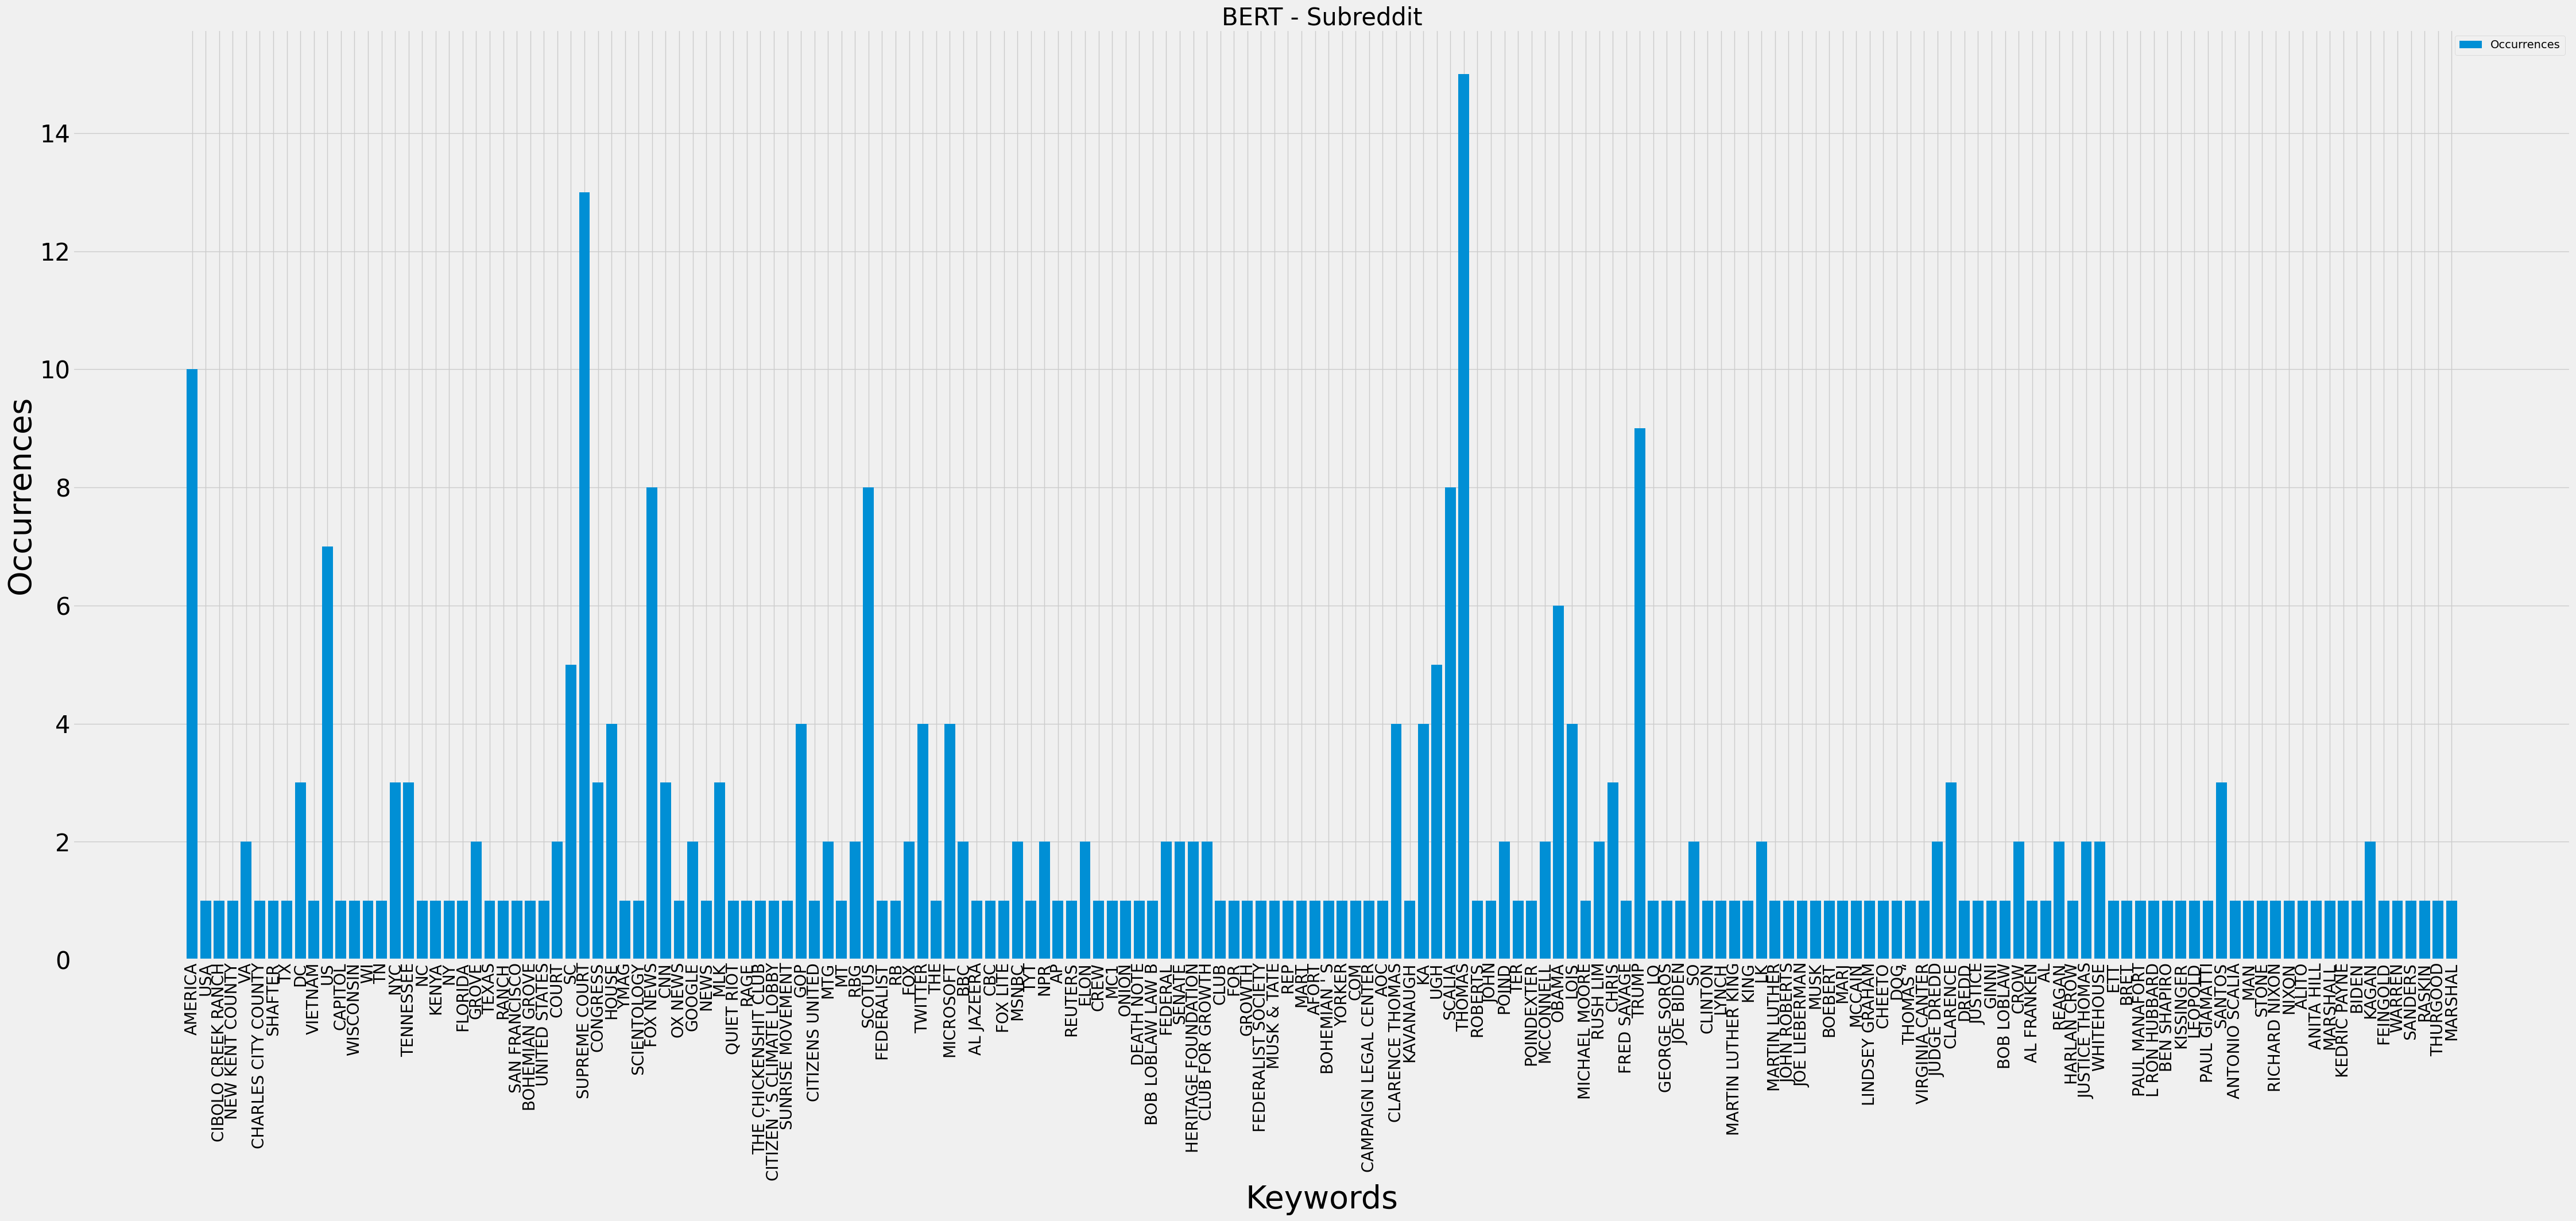

In [15]:
#14
width = 50
height = 20

x_axis = range(len(result_dict))

plt.style.use('fivethirtyeight')

plt.figure(figsize=(width,height))
plt.bar(x_axis,list(result_dict.values()),label="Occurrences")

plt.xticks(x_axis,list(result_dict.keys()), rotation=90, fontsize=20)
plt.yticks(fontsize=30)

plt.title("BERT - Subreddit",fontsize=30)
plt.xlabel("Keywords",fontsize=40)
plt.ylabel("Occurrences",fontsize=40)

plt.legend()

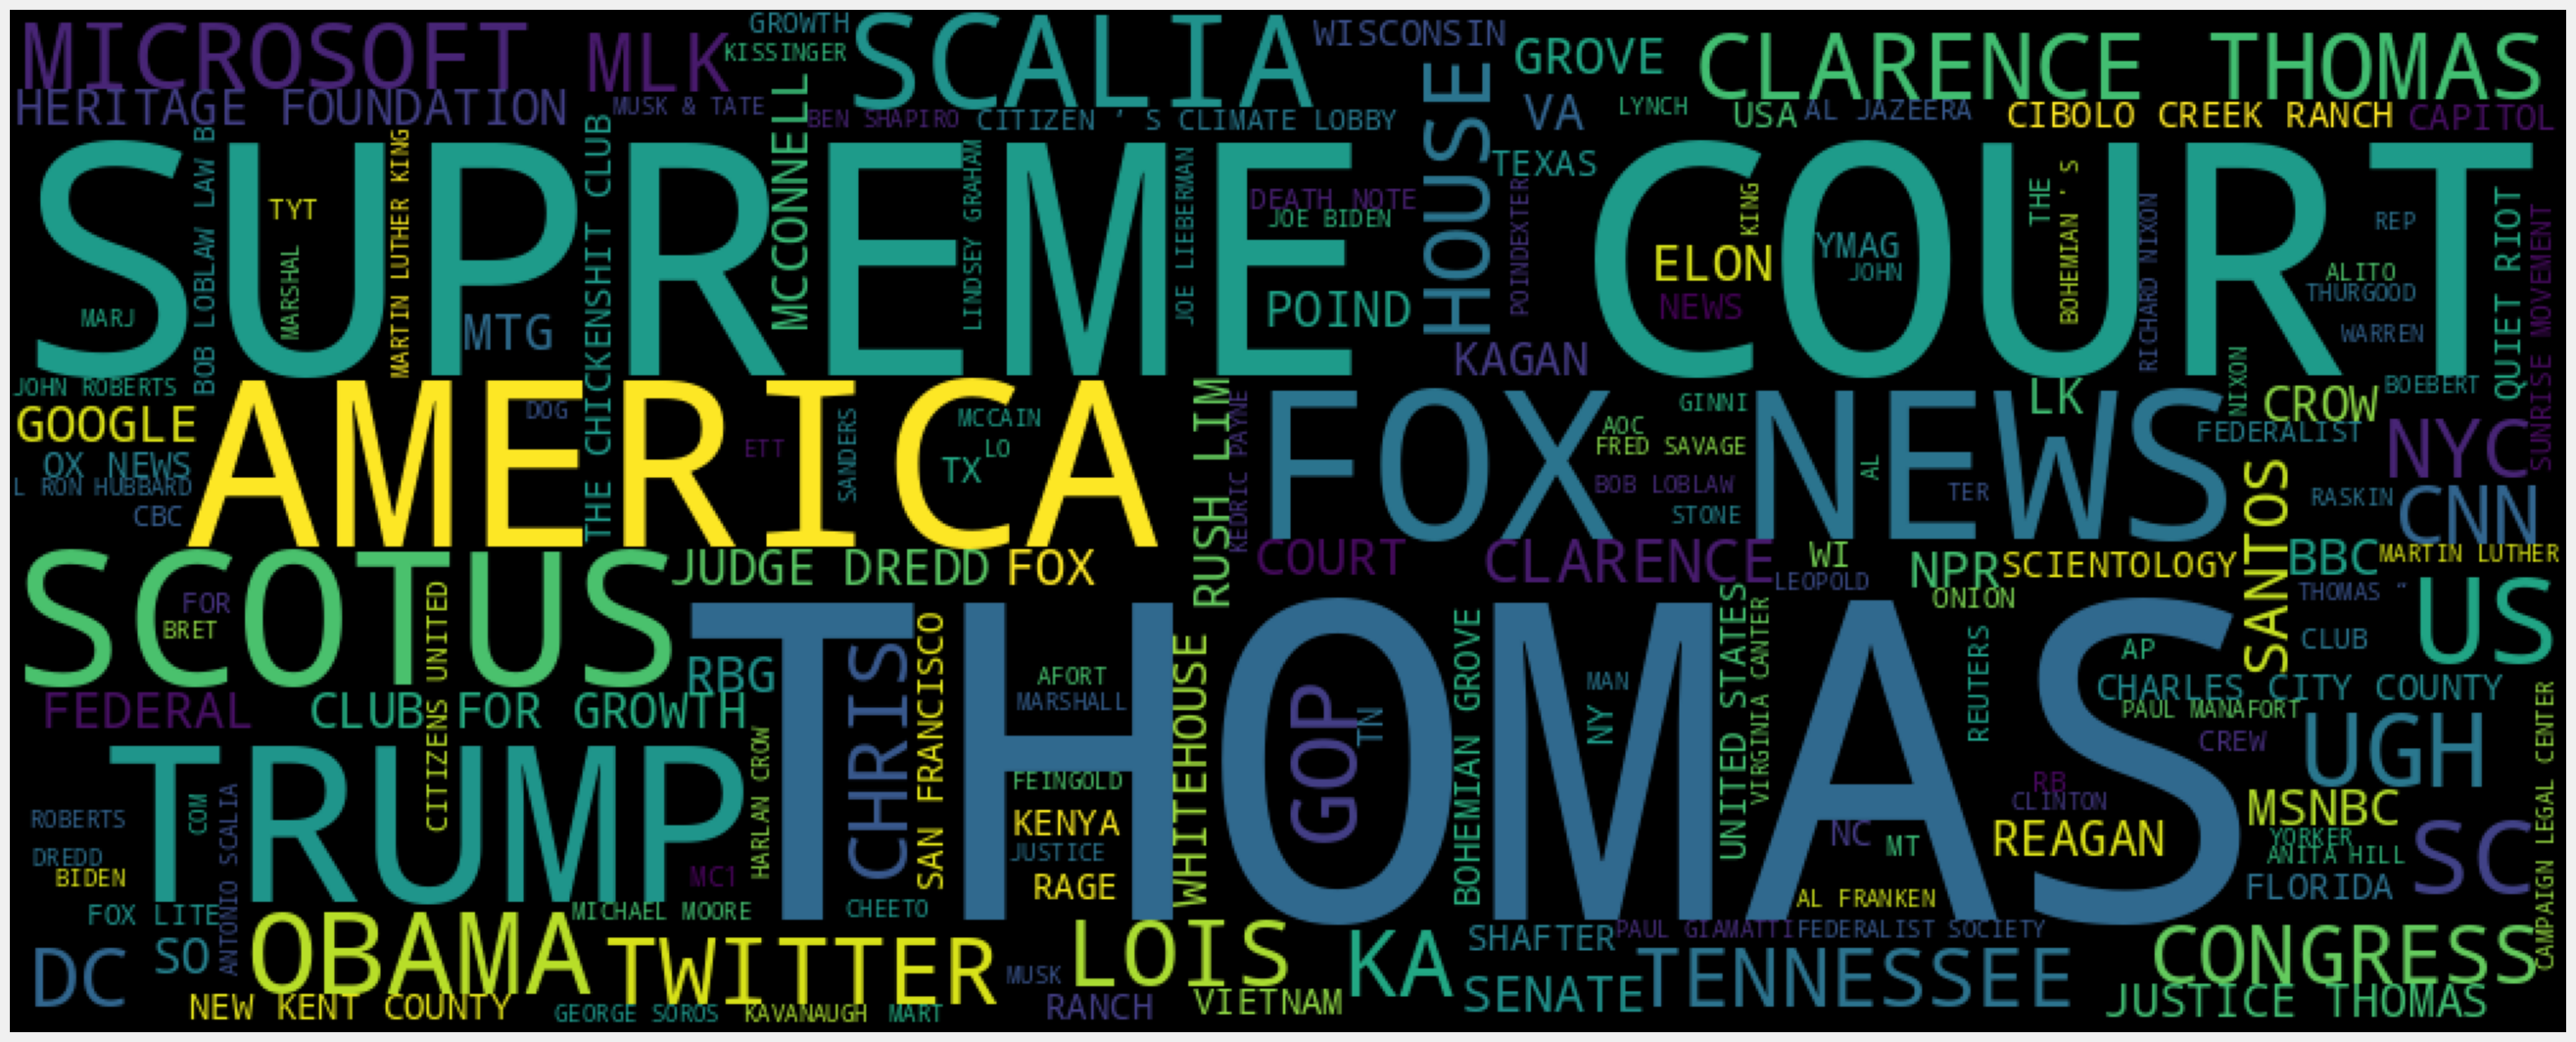

In [16]:
#15
cloud = wordcloud.WordCloud(width=1000, height=400)
cloud.generate_from_frequencies(result_dict)
plt.figure( figsize= (30,15))
plt.imshow(cloud)
plt.axis("off")
plt.show()

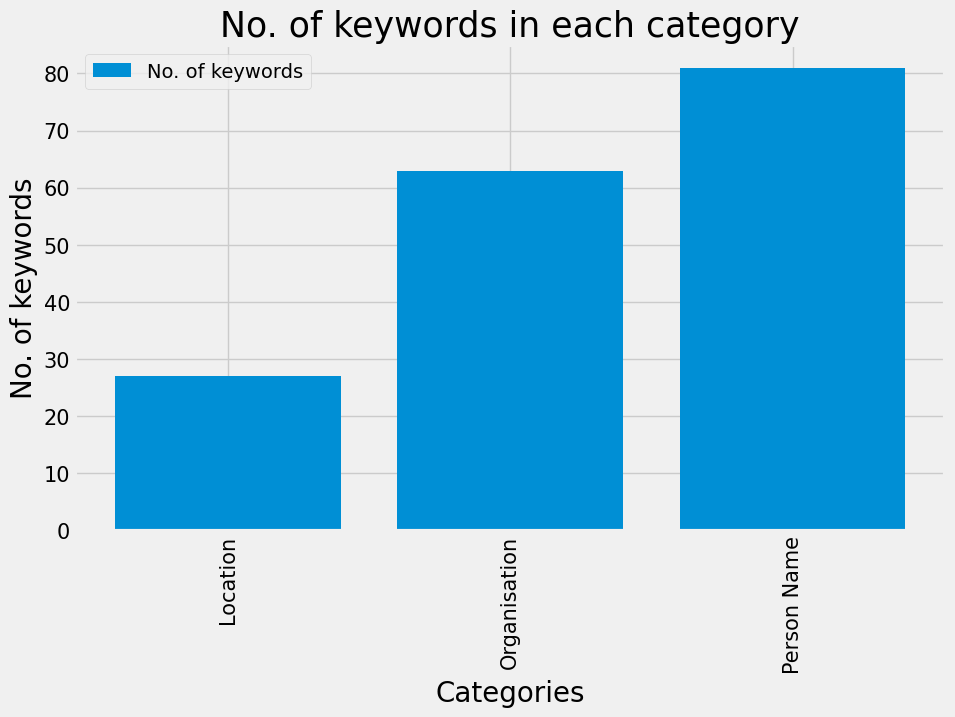

In [17]:
#16
print_dict['Location']=list(set(master_dict['I-LOC']+master_dict['B-LOC']))
print_dict['Organisation']=list(set(master_dict['I-ORG']+master_dict['B-ORG']))
print_dict['Person Name']=list(set(master_dict['I-PER']+master_dict['B-PER']))

loc_list = list(print_dict['Location'])
org_list = list(print_dict['Organisation'])
per_list = list(print_dict['Person Name'])

temp_dict={}

temp_dict['Location']=len(loc_list)
temp_dict['Organisation']=len(org_list)
temp_dict['Person Name']=len(per_list)

k_words=['Location','Organisation','Person Name']

width = 10
height = 6

x_axis = range(len(temp_dict))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(width,height))

plt.bar(x_axis,list(temp_dict.values()),label="No. of keywords")
plt.xticks(x_axis,list(temp_dict.keys()), rotation=90, fontsize=15)
plt.yticks(fontsize=15)

plt.title("No. of keywords in each category",fontsize=25)
plt.xlabel("Categories",fontsize=20)
plt.ylabel("No. of keywords",fontsize=20)

plt.legend()

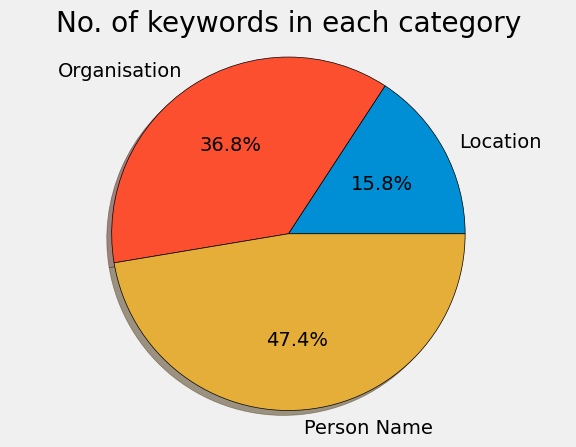

In [18]:
#17
# Creating dataset 
rd=list(temp_dict.values())

plt.pie(rd,labels=k_words,autopct='%1.1f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
plt.title('No. of keywords in each category')
plt.axis('equal')
plt.show()